In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import warnings

In [19]:
data = pd.read_excel('задание2.xlsx')
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
data

,staff,adverts,projects,profitability
0,8.768088,24.515827,8.499298,142.095390
1,9.129025,27.002612,7.414980,123.296482
2,8.269365,25.496132,6.524985,110.811052
3,9.838063,18.273113,5.211359,90.649576
4,10.382268,11.992892,7.973063,84.343632
...,...,...,...,...
45,8.721197,13.572740,2.435163,78.011921
46,10.711670,25.122307,7.184956,106.271309
47,9.577856,19.203858,5.538342,99.321657
48,7.027288,22.647938,5.340979,94.490648


Degree: 1, R^2 (train): 0.7427661023725618, R^2 (test): 0.2137375812805068


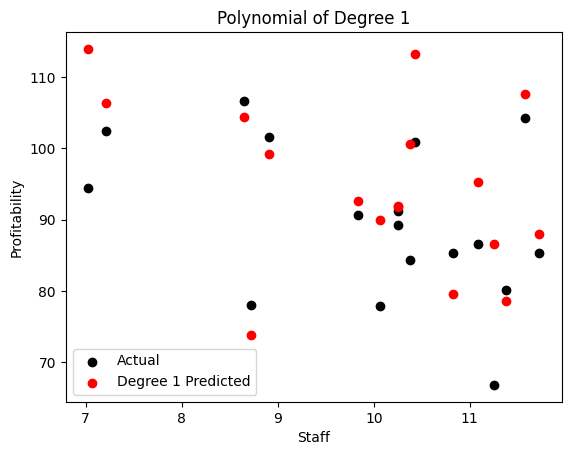

Degree: 2, R^2 (train): 0.9379060979076268, R^2 (test): 0.2587779713193311


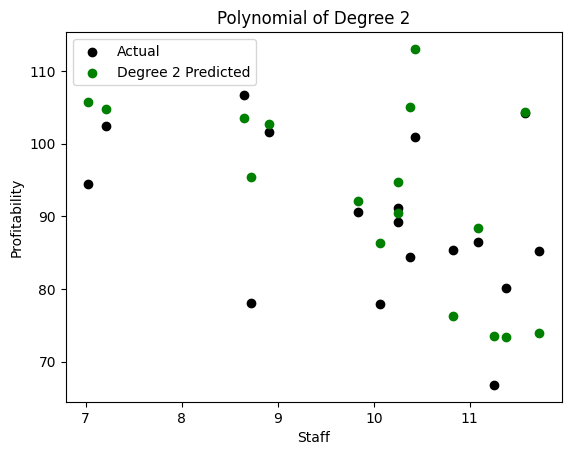

Degree: 3, R^2 (train): 0.9598501696048909, R^2 (test): -6.344492050222704
Результат достигнут за счет переобучения модели


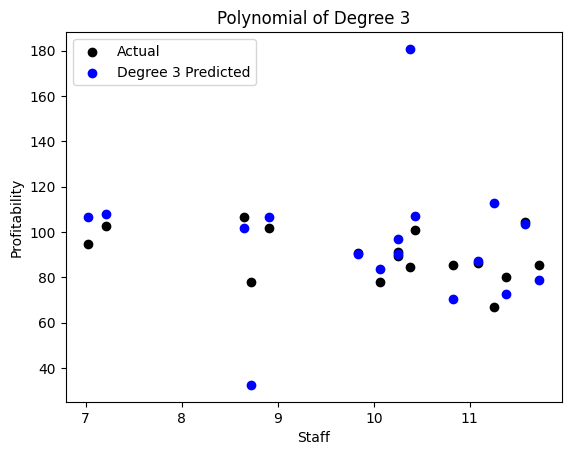

Degree: 4, R^2 (train): 1.0, R^2 (test): -37119.01556357811
Результат достигнут за счет переобучения модели


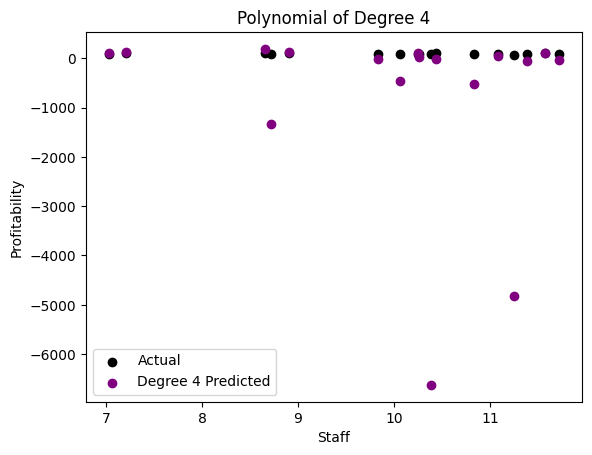

In [20]:
X = data[['staff', 'projects', 'adverts']]
y = data['profitability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


degrees = range(1, 5)
colors = ['red', 'green', 'blue', 'purple']

for i, degree in enumerate(degrees):
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    print(f"Degree: {degree}, R^2 (train): {r2_train}, R^2 (test): {r2_test}")

    if r2_train > 0.95 and r2_test < 0:
        print("Результат достигнут за счет переобучения модели")

    plt.scatter(X_test['staff'], y_test, color='black', label='Actual')
    plt.scatter(X_test['staff'], y_test_pred, color=colors[i], label=f'Degree {degree} Predicted')
    plt.title(f'Polynomial of Degree {degree}')
    plt.xlabel('Staff')
    plt.ylabel('Profitability')
    plt.legend()
    plt.show()

## Третья степень полинома оптимальна для наших данных